# 통계 분석, 상관 분석

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

## 한글 출력 지원하기
- MS Windows환경 혹은 Colab환경에 따라 선택하여 실행하시오.

In [ ]:
### 옵션 1. MS Windows 에서 한글 폰트 지원하기
import matplotlib as plt
import matplotlib.font_manager as fm

# 한글 폰트 지원
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [3]:
### 옵션 2. Colab에서 한글 폰트 지원 하기
# 1. 한글 폰트 설치 (나눔고딕)
!apt-get -qq -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. matplotlib에 한글 폰트 적용
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory det

# [1] 와인 품질 등급 데이터 통계 특성 파악하기

## 1. 데이터준비
### - 다운로드한 CSV 파일 정리하기

In [4]:
import pandas as pd

In [5]:
# red_df = pd.read_csv('../resource/W4/winequality-red.csv', sep = ';', header = 0, engine = 'python') # MS Windows용 코드 (각자 파일 위치에 맞게 수정하시오)
red_df = pd.read_csv('/content/drive/MyDrive/DA2025_W4/winequality-red.csv', sep = ';', header = 0, engine = 'python') # Colab용 코드 (각자 파일 위치에 맞게 수정하시오)

In [6]:
# white_df = pd.read_csv('../resource/W4/winequality-white.csv', sep = ';', header = 0, engine= 'python') # MS Windows용 코드 (각자 파일 위치에 맞게 수정하시오)
white_df = pd.read_csv('/content/drive/MyDrive/DA2025_W4/winequality-white.csv', sep = ';', header = 0, engine= 'python') # Colab용 코드 (각자 파일 위치에 맞게 수정하시오)

In [7]:
# red_df.to_csv('../resource/W4/output/winequality-red2.csv',index = False) # MS Windows용 코드 (각자 파일 위치에 맞게 수정하시오)
red_df.to_csv('/content/drive/MyDrive/DA2025_W4/winequality-red2.csv',index = False) # Colab용 코드 (각자 파일 위치에 맞게 수정하시오)

In [8]:
# white_df.to_csv('../resource/W4/output/winequality-white2.csv', index = False) # MS Windows용 코드 (각자 파일 위치에 맞게 수정하시오)
white_df.to_csv('/content/drive/MyDrive/DA2025_W4/winequality-white2.csv', index = False) # Colab용 코드 (각자 파일 위치에 맞게 수정하시오)

### - 데이터 병합하기

In [9]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
red_df.insert(0, column = 'type', value = 'red')

In [11]:
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
red_df.shape

(1599, 13)

In [13]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
white_df.insert(0, column = 'type', value = 'white')

In [15]:
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
white_df.shape

(4898, 13)

In [17]:
wine = pd.concat([red_df, white_df])

In [18]:
wine.shape

(6497, 13)

In [19]:
# wine.to_csv('../resource/W4/wine.csv', index = False) # MS Windows용 코드 (각자 위치에 맞게 수정하시오)
wine.to_csv('/content/drive/MyDrive/DA2025_W4/wine.csv', index = False) # Colab용 코드 (각자 위치에 맞게 수정하시오)

## 2. 데이터 탐색

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [21]:
wine.iloc[[2000, 2001]]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
401,white,6.8,0.37,0.51,11.8,0.044,62.0,163.0,0.9976,3.19,0.44,8.8,5
402,white,6.1,0.35,0.07,1.4,0.069,22.0,108.0,0.9934,3.23,0.52,9.2,5


In [22]:
wine.iloc[[401, 402]]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
401,red,7.7,0.26,0.30,1.7,0.059,20.0,38.0,0.9949,3.29,0.47,10.8,6
402,red,12.2,0.48,0.54,2.6,0.085,19.0,64.0,1.0000,3.10,0.61,10.5,6


In [23]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [24]:
wine.reset_index(drop=True, inplace=True) # drop=True: 기존 index 제거

In [25]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### 컬럼이름의 띄어쓰기를 밑줄로 바꾸기

In [26]:
wine.columns = wine.columns.str.replace(' ', '_')

In [27]:
wine

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [28]:
wine.loc[wine['type']=='red'].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
wine.loc[wine['type']=='white'].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [30]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [31]:
sorted(wine.quality.unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [32]:
wine.quality.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [33]:
wine.loc[wine['type']=='red'].sort_values(by='quality').quality.value_counts(sort=False)

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [34]:
wine.loc[wine['type']=='white'].sort_values(by='quality').quality.value_counts(sort=False)

,count
quality,
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


## 3. 결과 시각화

### - 와인 유형에 따른 품질 등급 히스토그램 그리기

In [35]:
import matplotlib.pyplot as plt

In [36]:
import seaborn as sns

In [37]:
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']

In [38]:
red_wine_quality.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [39]:
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

In [40]:
white_wine_quality.head()

,quality
1599,6
1600,6
1601,6
1602,6
1603,6


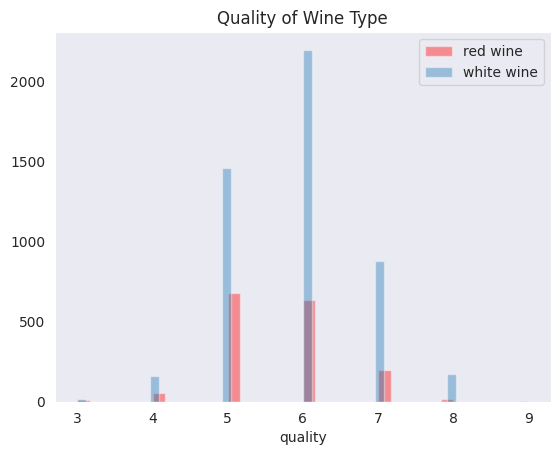

In [41]:
sns.set_style('dark')
sns.distplot(red_wine_quality, kde = False, color = "red", label = 'red wine')
sns.distplot(white_wine_quality, kde = False, label = 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

# [2] 상관분석 + 히트맵
#      타이타닉호 생존율 분석하기

## 1. 데이터 수집

In [42]:
import seaborn as sns

In [43]:
import pandas as pd

In [109]:
titanic = sns.load_dataset("titanic")

In [45]:
# titanic.to_csv('../resource/W4/titanic.csv', index = False) # MS Windows용 코드 (각자 파일 위치에 맞게 수정하시오)
titanic.to_csv('/content/drive/MyDrive/DA2025_W4/titanic.csv', index = False) # Colab용 코드 (각자 파일 위치에 맞게 수정하시오)

## 2. 데이터 탐색

#### - 데이터 파악하기

In [110]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [111]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [112]:
titanic.shape

(891, 15)

In [113]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [114]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [115]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [116]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
titanic.describe(include=[object, 'category', bool])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


## 3. 데이터 준비

#### - 결측값 있는지 확인하기

In [118]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


#### - age 열의 결측값을 중앙값으로 치환하기

In [119]:
titanic['age']

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [120]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [121]:
titanic['age']

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


#### - embarked 열의 결측값을 최빈값으로 치환하기

In [122]:
titanic['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [123]:
titanic['embarked'] = titanic['embarked'].fillna('S')

#### - embark_town 열의 결측값을 최빈값으로 치환하기

In [124]:
titanic['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


In [125]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

#### - deck 열의 결측값을 최빈값으로 치환하기

In [126]:
titanic['deck'].value_counts()

,count
deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [127]:
titanic['deck']

,deck
0,NaN
1,C
2,NaN
3,C
4,NaN
...,...
886,NaN
887,B
888,NaN
889,C


In [128]:
titanic['deck'] = titanic['deck'].fillna('C')

In [130]:
titanic['deck']

,deck
0,C
1,C
2,C
3,C
4,C
...,...
886,C
887,B
888,C
889,C


#### - 결측치가 다 채워졌는지 확인하기

In [131]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


## 4. 데이터 시각화

#### - 데이터의 기본 정보 탐색하기

In [132]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [133]:
titanic.survived.value_counts()

,count
survived,
0,549
1,342


#### - 차트를 그려 데이터를 시각적으로 탐색하기

In [134]:
import matplotlib.pyplot as plt

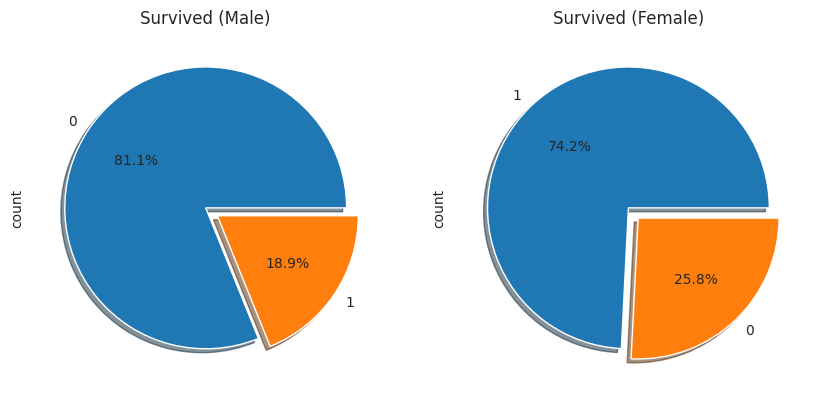

In [135]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

#### - 등급별 생존자 수를 차트로 나타내기

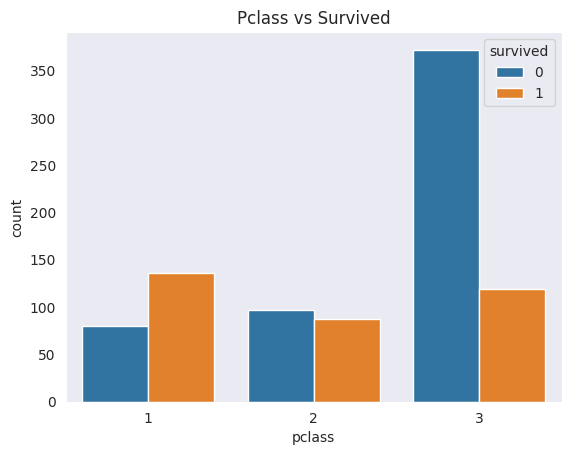

In [136]:
sns.countplot(x='pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

## 5. 변수간 상관성 파악

#### - 상관분석을 위한 상관계수를 구하고 저장하기

In [137]:
titanic['sex'] = titanic['sex'].replace({'male': 1, 'female': 0}) # String data type이어서 숫자로 변환이 안되는 문제 해결하고자 숫자로 변경

In [138]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [139]:
titanic['who'].value_counts()

,count
who,
man,537
woman,271
child,83


In [140]:
titanic['who'] = titanic['who'].replace({'man': 0, 'woman': 1, 'child': 2}) # String data type이어서 숫자로 변환이 안되는 문제 해결하고자 숫자로 변경

In [141]:
titanic['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


In [142]:
titanic['class'] = titanic['class'].replace({'First': 0, 'Second': 1, 'Third': 2}) # String data type이어서 숫자로 변환이 안되는 문제 해결하고자 숫자로 변경

In [143]:
titanic['alive'].value_counts()

,count
alive,
no,549
yes,342


In [144]:
titanic['alive'] = titanic['alive'].replace({'no': 0, 'yes': 1}) # String data type이어서 숫자로 변환이 안되는 문제 해결하고자 숫자로 변경

In [145]:
# titanic['deck'].value_counts()
# titanic['embarked'].value_counts()
titanic['embark_town'].value_counts()

,count
embark_town,
Southampton,646
Cherbourg,168
Queenstown,77


In [146]:
titanic['deck'] = titanic['deck'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5,'G': 6}) # String data type이어서 숫자로 변환이 안되는 문제 해결하고자 숫자로 변경
titanic['embarked'] = titanic['embarked'].replace({'S': 0, 'C': 1, 'Q': 2}) # String data type이어서 숫자로 변환이 안되는 문제 해결하고자 숫자로 변경
titanic['embark_town'] = titanic['embarked'].replace({'Southhampton': 0, 'Cherbourg': 1, 'Queenstown': 2}) # String data type이어서 숫자로 변환이 안되는 문제 해결하고자 숫자로 변경

In [147]:
titanic_corr = titanic.corr(method = 'pearson')

In [148]:
titanic_corr

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811,-0.338481,0.472637,-0.557080,0.089095,0.106811,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702,1.000000,-0.016018,0.094035,0.022584,0.045702,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569,0.131900,-0.722076,0.908578,-0.078556,-0.116569,-0.543351,0.303646
age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165,-0.339898,-0.432737,0.247704,-0.042536,-0.009165,-0.064910,0.171647
sibsp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961,0.083081,0.342977,-0.253586,0.004008,-0.059961,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665,0.018443,0.413947,-0.349943,0.022493,-0.078665,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142,-0.549500,0.136513,-0.182024,-0.101230,0.062142,0.257307,-0.271832
embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000,0.045702,0.075085,-0.108547,-0.067930,1.000000,0.106811,0.017807
class,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702,1.000000,-0.016018,0.094035,0.022584,0.045702,-0.338481,0.135207
who,0.472637,-0.016018,-0.722076,-0.432737,0.342977,0.413947,0.136513,0.075085,-0.016018,1.000000,-0.914615,0.092130,0.075085,0.472637,-0.452753


In [149]:
# titanic_corr.to_csv('../resource/W4/output/titanic_corr.csv', index = False) # MS Windows 용 코드 (각자의 위치에 맞게 수정하시오)
titanic_corr.to_csv('/content/drive/MyDrive/DA2025_W4/titanic_corr.csv', index = False) # Colab 용 코드 (각자의 위치에 맞게 수정하시오)

#### - 상관계수 확인하기

- 저장한 titanic_corr.csv 파일을 열어본다

#### - 특정 변수 사이의 상관계수 구하기

In [150]:
titanic['survived'].corr(titanic['adult_male'])

np.float64(-0.5570800422053257)

In [151]:
titanic['survived'].corr(titanic['fare'])

np.float64(0.2573065223849625)

샤피로-윌크 검정(Shapiro-Wilk)

- 샤피로-윌크 검정은 데이터의 정규성(normailty)을 검정하는 데 사용됩니다.
    - 귀무가설: 정규성을 만족한다.
    - 대립가설: 정규성을 만족하지 않는다.
    - pg.normality(): W값과 p-value 값, 귀무가설 채택(True)/기각(False)을 반환한다.
- 일반적으로 p-value가 0.05보다 낮은 경우 "정규성이 위배" 되고 그 외의 경우 "정규성이 만족"된다고 봅니다.
- W 값은 정규성 모양에 얼마나 유사한지를 나타내는 값으로 0(정규성 모양과 거리가 멈) ~ 1(정규성 모양임임) 사이의 값을 가진다.

In [152]:
# stress = pd.read_csv('../resource/W4/stress.csv', sep = ',', header = 0, engine = 'python') # MS Windows용 코드(각자 위치에 맞게 수정하시오)
stress = pd.read_csv('/content/drive/MyDrive/DA2025_W4/stress.csv', sep = ',', header = 0, engine = 'python') # Colab용 코드 (각자 위치에 맞게 수정하시오)

In [88]:
# pingouin 패키지 설치가 안되었으면 설치하자
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.8 MB/s eta 0:00:00


In [153]:
import pingouin as pg

pg.normality(stress['Stress']).round(4)
# pg.normality(titanic.loc[survived]).round(4)
# pg.normality(titanic.loc[titanic['sex']==0,'age']).round(4)


,W,pval,normal
Stress,0.997,0.0552,True


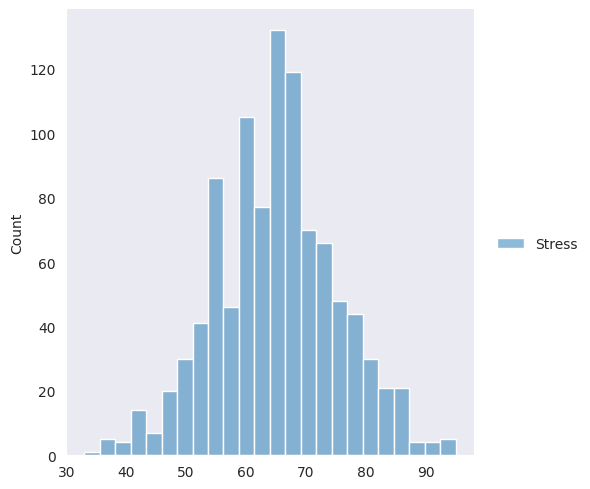

In [154]:
sns.displot(stress)

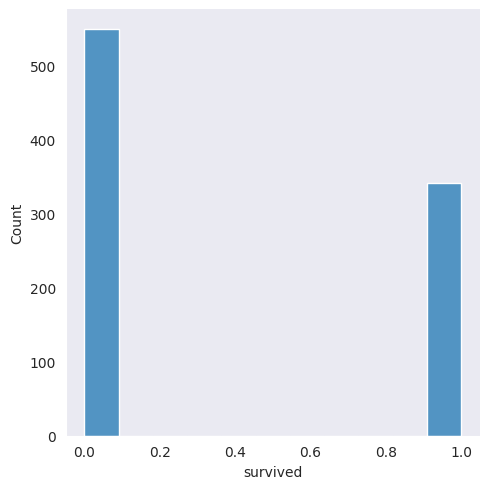

In [155]:
# sns.kdeplot(titanic.survived)
sns.displot(titanic.survived)
# sns.displot(titanic.loc[titanic['sex']==0,'age'])

In [156]:
pg.normality(titanic.loc[titanic['sex']==0,'age']).round(4)

,W,pval,normal
age,0.9736,0.0,False


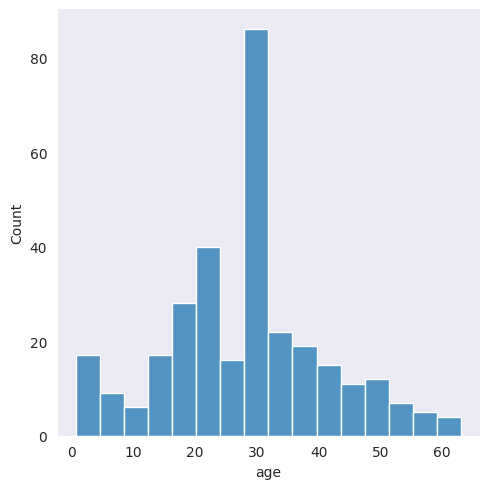

In [157]:
# sns.kdeplot(titanic.loc[titanic['sex']==0,'age'])
sns.displot(titanic.loc[titanic['sex']==0,'age'])

In [158]:
pg.normality(titanic.adult_male).round(4)

,W,pval,normal
adult_male,0.6211,0.0,False


In [159]:
pg.corr(titanic.survived, titanic.adult_male, method='pearson').round(4)

,n,r,CI95%,p-val,BF10,power
pearson,891,-0.5571,"[-0.6, -0.51]",0.0,1.544e+70,1.0


In [160]:
pg.corr(titanic.survived, titanic.adult_male, method='spearman').round(4)

,n,r,CI95%,p-val,power
spearman,891,-0.5571,"[-0.6, -0.51]",0.0,1.0


In [161]:
pg.corr(titanic.survived, titanic.adult_male, method='kendall').round(4)

,n,r,CI95%,p-val,power
kendall,891,-0.5571,"[-0.6, -0.51]",0.0,1.0


## 6. 결과 시각화

#### - 산점도로 상관 분석 시각화하기

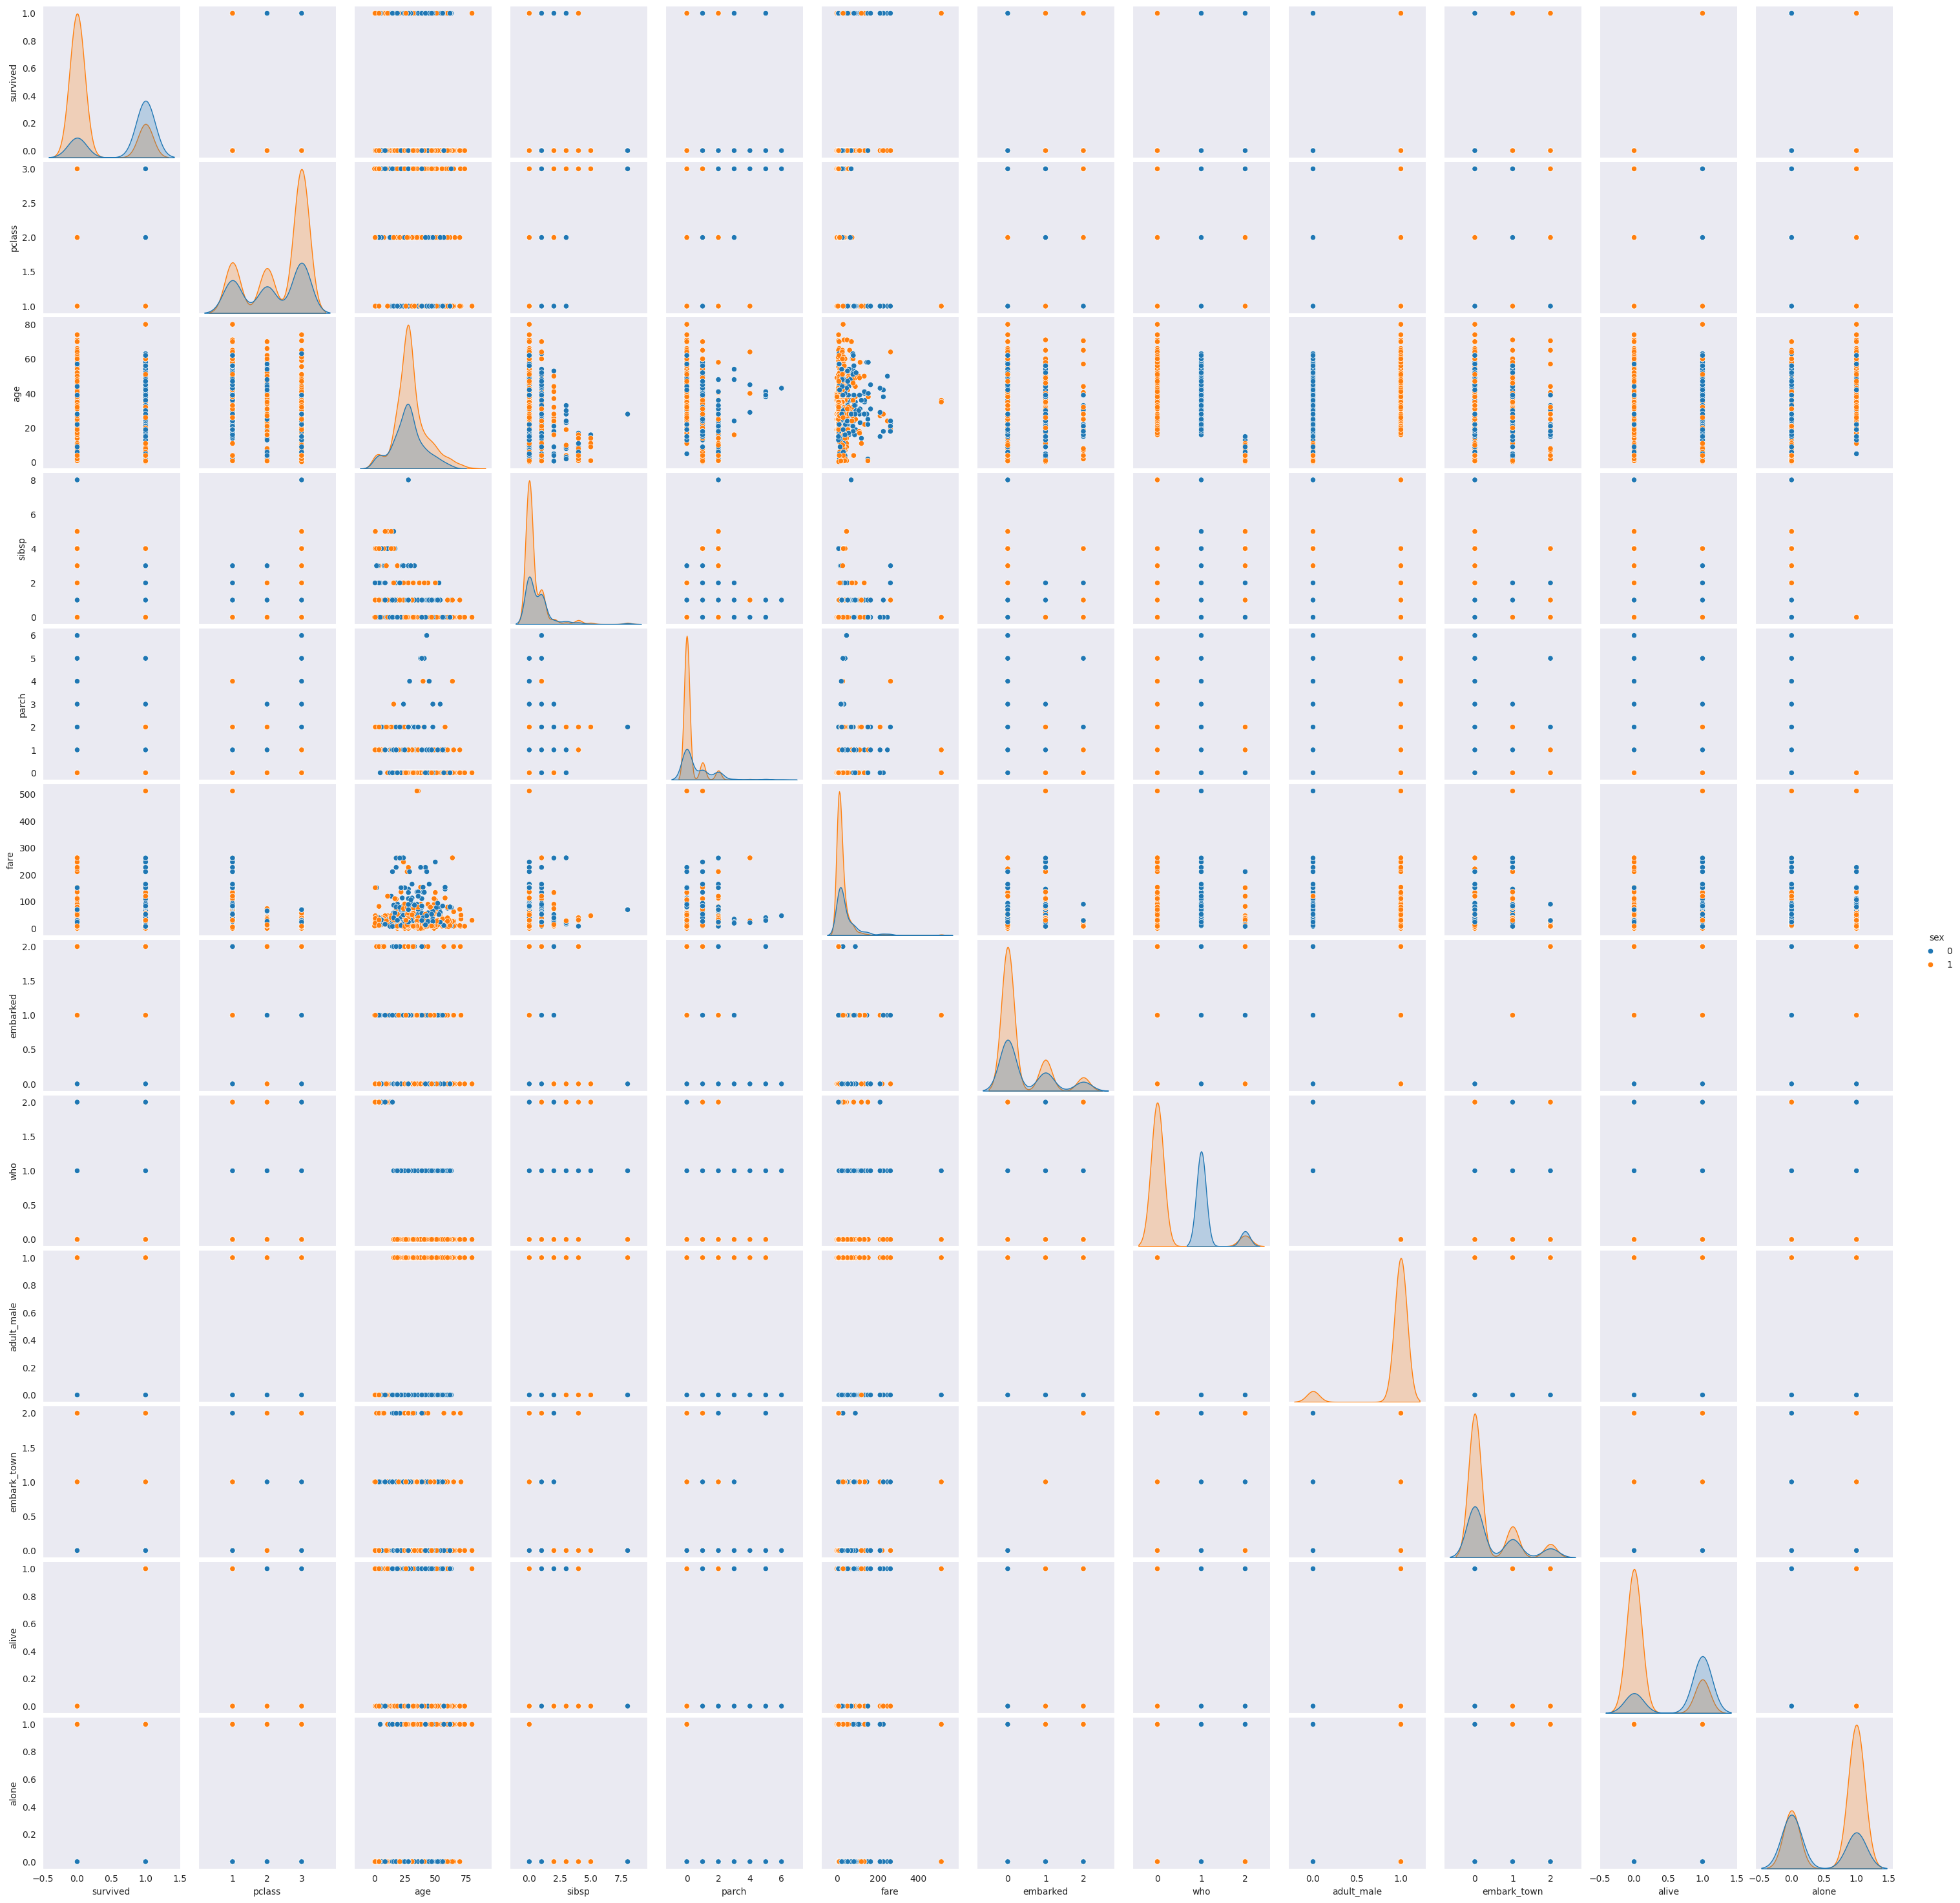

In [162]:
sns.pairplot(titanic, hue = 'sex')

plt.show()

#### - 두 변수의 상관관계 시각화하기

#### - 객실 등급과 생존의 상관관계를 seaborn 패키지의 catplot으로 시각화해보자

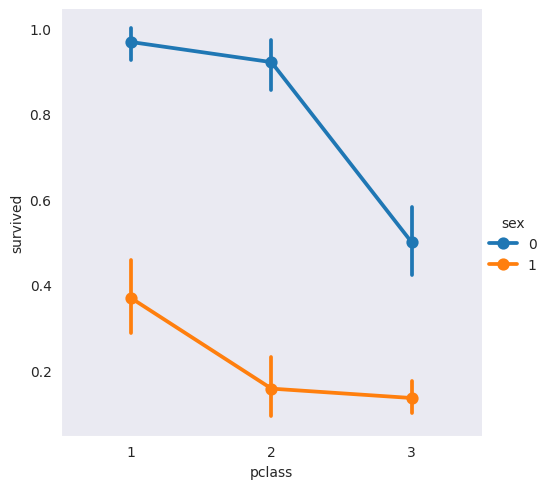

In [163]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

plt.show()

#### - 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [164]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [165]:
titanic['age2'] = titanic['age'].apply(category_age)

In [105]:
# titanic['sex'] = titanic['sex'].map({'male':1, 'female':0}) # 앞에서 숫자로 변경 했기 때문에 여기서는 코멘트 처리함

In [166]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [167]:
# titanic.to_csv('../resource/W4/output/titanic3.csv', index = False) # MS Windows용 코드 (각자 위치에 맞게 수정하시오)
titanic.to_csv('/content/drive/MyDrive/DA2025_W4/titanic3.csv', index = False) # Colab용 코드 (각자 위치에 맞게 수정하시오)

In [168]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

In [169]:
heatmap_data

,survived,sex,age2,family,pclass,fare
0,0,1,2,2,3,7.2500
1,1,0,3,2,1,71.2833
2,1,0,2,1,3,7.9250
3,1,0,3,2,1,53.1000
4,0,1,3,1,3,8.0500
...,...,...,...,...,...,...
886,0,1,2,1,2,13.0000
887,1,0,1,1,1,30.0000
888,0,0,2,4,3,23.4500
889,1,1,2,1,1,30.0000


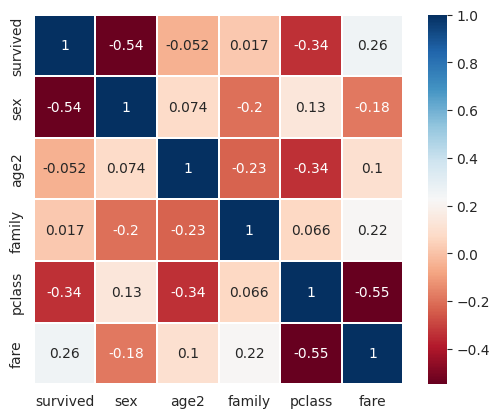

In [170]:
colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,
annot_kws = {"size": 10})

plt.show()